In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Q. Implement Region growing algorithm. Observe the performance for various seed points


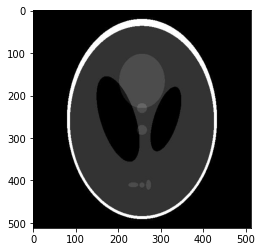

In [10]:
img = cv2.imread("testimage.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

In [11]:
class Point(object):
 def __init__(self,x,y):
  self.x = x
  self.y = y

def regionGrow(img, seed, thresh,p = 1):
 height, weight = img.shape
 visited = np.zeros(img.shape)
 queue = []
 queue.append(seed)
 growthpixels = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), Point(0, 1), Point(-1, 1), Point(-1, 0)]
 
 while queue:
  currentPoint = queue.pop(0)
  visited[currentPoint.x,currentPoint.y] = 1
  for i in range(8):
   tmpX = currentPoint.x + growthpixels[i].x
   tmpY = currentPoint.y + growthpixels[i].y
   if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
    continue
   if abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpX,tmpY])) < thresh and visited[tmpX,tmpY] == 0:
    visited[tmpX,tmpY] = 1
    queue.append(Point(tmpX,tmpY))
 return visited

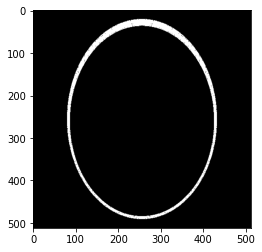

In [12]:
binaryImage = regionGrow(img, Point(97, 137), 10)
plt.imshow(binaryImage, cmap="gray")

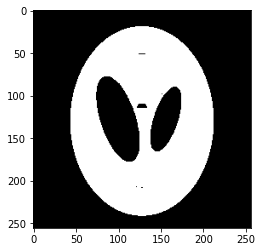

In [13]:
resized = cv2.resize(img,(256,256))
seed = Point(97, 137)
plt.imshow(regionGrow(resized, seed,10), cmap="gray")

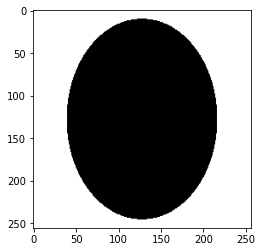

In [15]:
seed = Point(0, 0)
plt.imshow(regionGrow(resized, seed, 10), cmap="gray")

The seed point decides which segment of the image we are growing our region on. It acts on the starting point on the basis that the selected pixel is part of our required segment<br>
While there may exist many segments, region growing focuses on segments containing the seeds<br>
As observed in the above results, various seed points resulted in different segments.